In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.io.wavfile as wavfile
import pandas as pd
from urllib.parse import urlparse as up
from tools.load import load
from tools.cutter import Cutter
from tools.display import disp
from tools.explorer import Explorer

In [2]:
dataKey = 'vocals_gerardo'

In [3]:
original, sampleRate = load.audio(dataKey)

ipd.Audio(data=original,rate=sampleRate)

Loading data/original/vocals_gerardo.wav


Sample bits: 743392 (bits)
Sampling rate: 22050 (bits/second)
Duration: 33.71392290249433 (seconds)


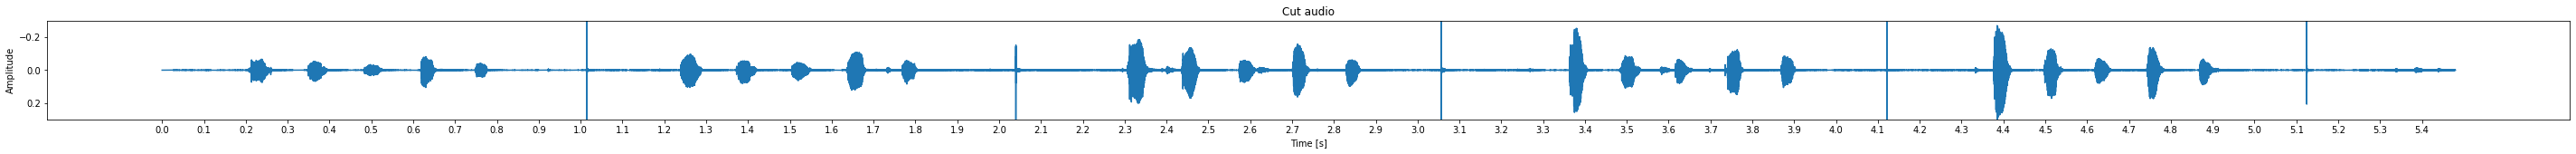

In [4]:


disp.specs(original,sampleRate)

timeInterval = (0,5.48)
figsize = (50, 2)
step = 0.1
maxAmp = 0.3
disp.audio(original,'Cut audio',timeInterval,maxAmp,step,figsize)



In [5]:
config = load.cutConfig(dataKey)
config.head()
# config

data/original/vocals_gerardo.cutconfig.csv


MARK          KEY        LABEL
0  0.00  tick_mark_0  Tick Mark 0
1  1.25  gerardo_1_A     Vocal 1A
2  1.65    space_1_0    Space 1 0
3  2.10  gerardo_1_E     Vocal 1E
4  2.45     space_1_    Space 1 1

In [6]:
cutter = Cutter(config)
split, intervals, periods = cutter.cutAll(original,sampleRate)

data/original/vocals_gerardo.cutconfig.csv


In [ ]:
xplor = Explorer(split, intervals, periods, load.cutConfig('vocals_gerardo'))

In [33]:
ipd.Audio(data=xplor.data('gerardo_1_E')[0],rate=sampleRate)

Sample bits: 8820 (bits)
Sampling rate: 22050 (bits/second)
Duration: 0.4 (seconds)
Sample bits: 8820 (bits)
Sampling rate: 22050 (bits/second)
Duration: 0.4 (seconds)


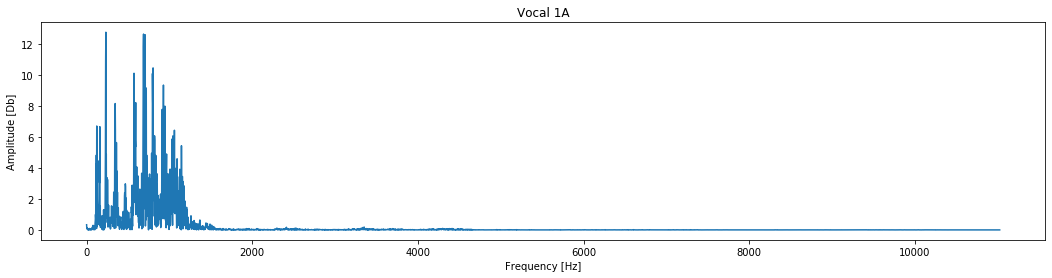

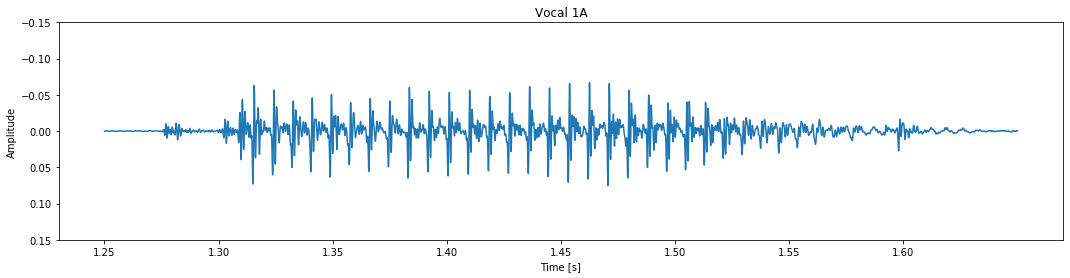

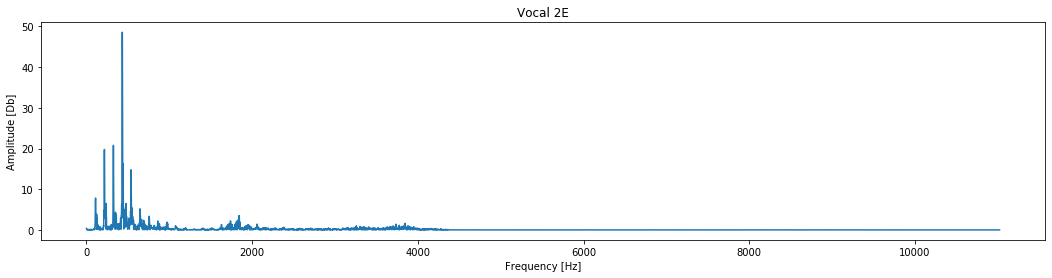

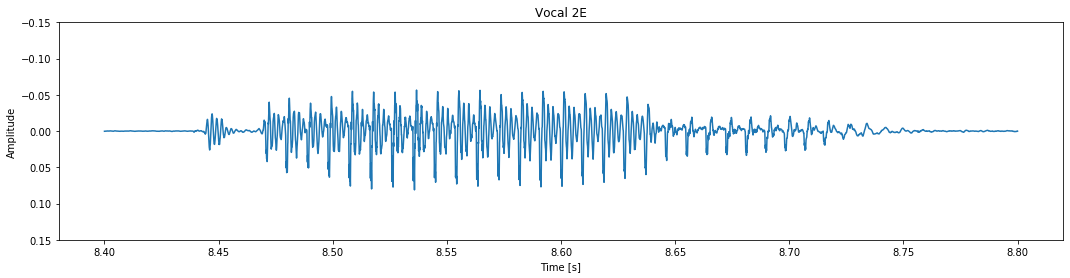

In [38]:
height = 4
step = 0.05
maxAmp = 0.15

current, interval, period, title = xplor.data('gerardo_1_A')
disp.specs(current, sampleRate)
disp.spectra(np.fft.fft(current),sampleRate, title,figsize=(18,height))
disp.audio(current,title,period,step=step,maxAmp=maxAmp)

current, interval, period, title = xplor.data('gerardo_2_E')
disp.specs(current, sampleRate)
disp.spectra(np.fft.fft(current),sampleRate, title,figsize=(18,height))
disp.audio(current,title,period,step=step,maxAmp=maxAmp)

# current, interval, period = xplor.data('gerardo_2_E')
# # disp.spectra(np.fft.fft(current),sampleRate, 'Vocal 2 E',figsize=(18,height))
# disp.audio(current,'Cut audio',period,step=step,maxAmp=maxAmp)

# current, interval, period = xplor.data('gerardo_3_E')
# # disp.spectra(np.fft.fft(current),sampleRate, 'Vocal 3 E',figsize=(18,height))
# disp.audio(current,'Cut audio',period,step=step,maxAmp=maxAmp)

# current, interval, period = xplor.data('gerardo_4_E')
# # disp.spectra(np.fft.fft(current),sampleRate, 'Vocal 4 E',figsize=(18,height))
# disp.audio(current,'Cut audio',period,step=step,maxAmp=maxAmp)

# current, interval, period = xplor.data('gerardo_5_E')
# # disp.spectra(np.fft.fft(current),sampleRate, 'Vocal 5 E',figsize=(18,height))
# disp.audio(current,'Cut audio',period,step=step,maxAmp=maxAmp)

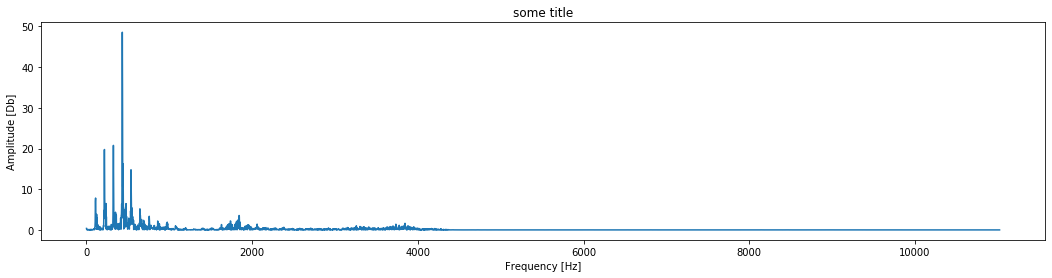

In [53]:
current = xplor.data('gerardo_2_E')
disp.spectra(np.fft.fft(current),sampleRate, 'some title')

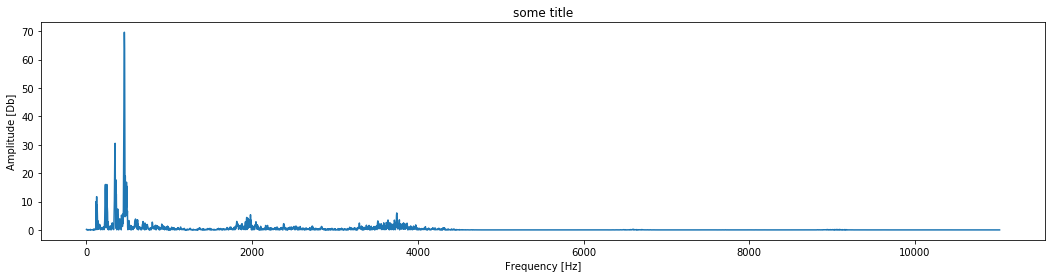

In [55]:
current = xplor.data('gerardo_3_E')
disp.spectra(np.fft.fft(current),sampleRate, 'some title')

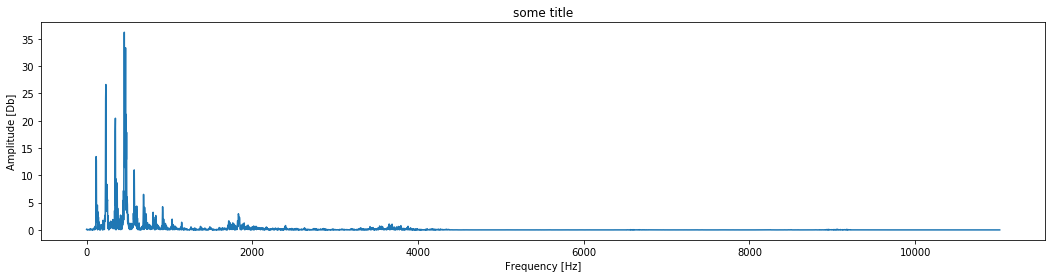

In [56]:
current = xplor.data('gerardo_4_E')
disp.spectra(np.fft.fft(current),sampleRate, 'some title')

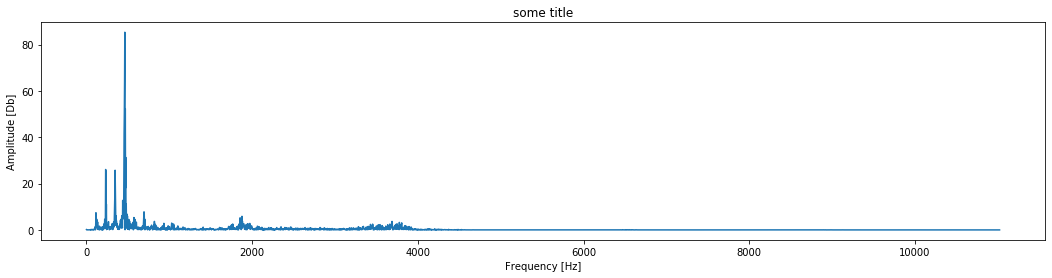

In [58]:
current = xplor.data('gerardo_5_E')
disp.spectra(np.fft.fft(current),sampleRate, 'some title')

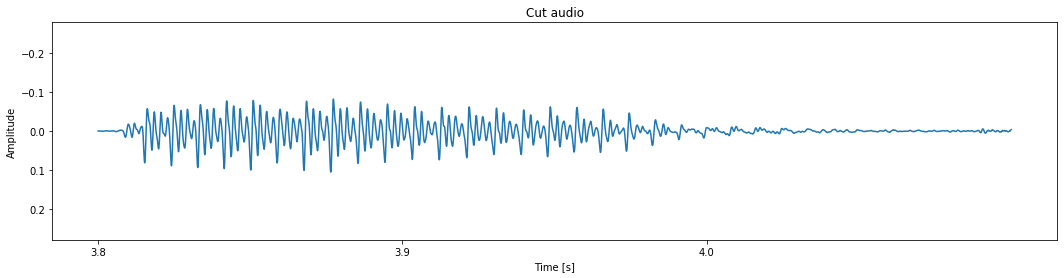

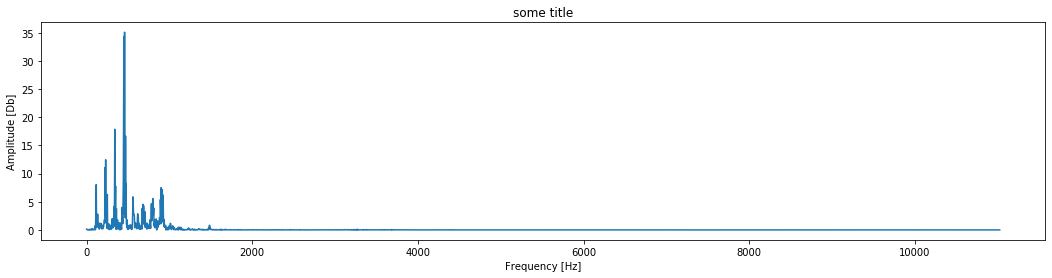

In [20]:
step = 0.1
maxAmp = 0.28
idx = 7
current = split[idx]
curPeriod = periods[idx]
disp.audio(current,'Cut audio',curPeriod,step=step,maxAmp=maxAmp)

disp.spectra(np.fft.fft(current),sampleRate, 'some title')

plt.show()

In [10]:
np.fft.fft(current)

array([0.00142249+0.j        , 0.00194354+0.00042837j,
       0.00113353-0.00046254j, ..., 0.00150305+0.00099717j,
       0.00113353+0.00046254j, 0.00194354-0.00042837j])

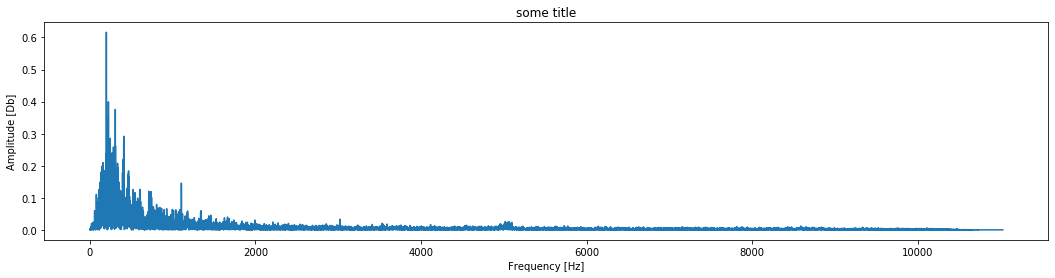

In [12]:
disp.spectra(np.fft.fft(current),sampleRate, 'some title')

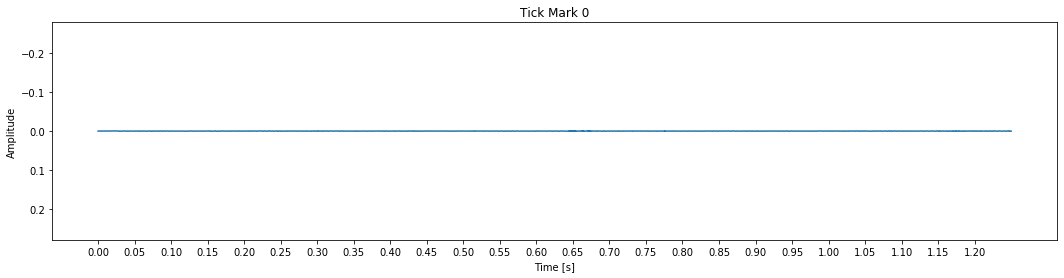

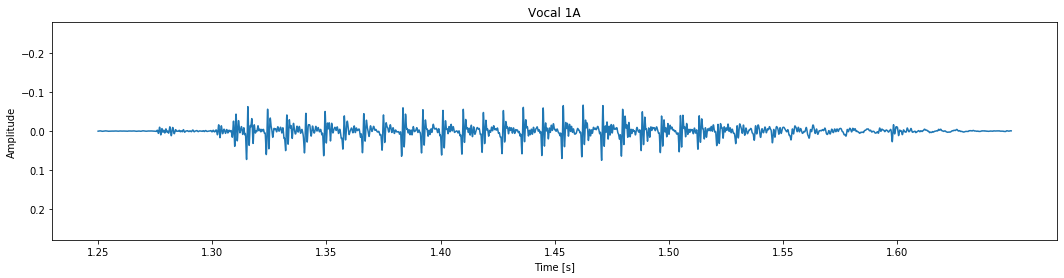

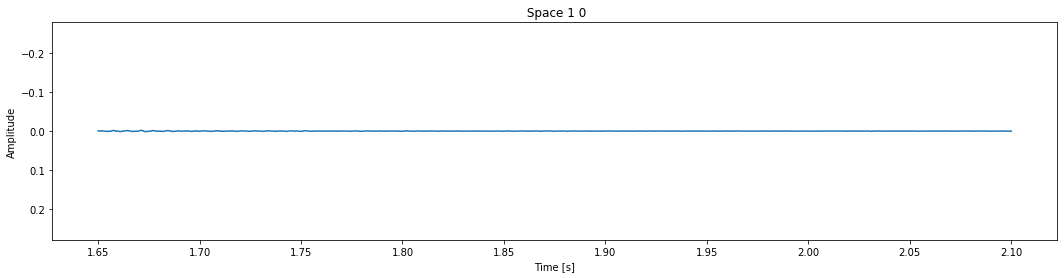

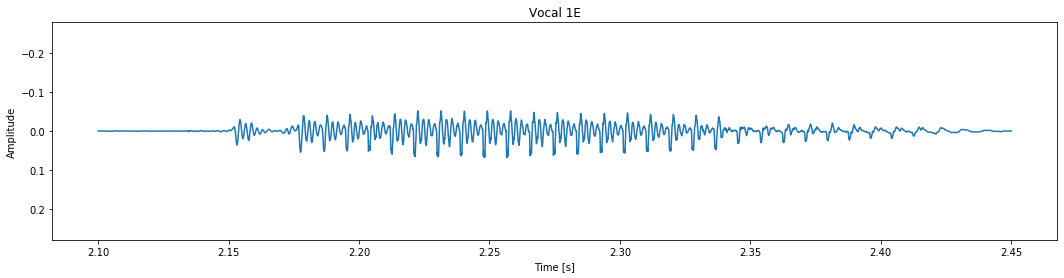

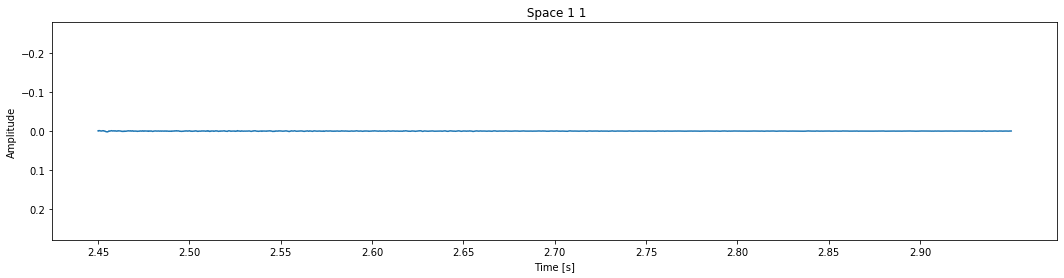

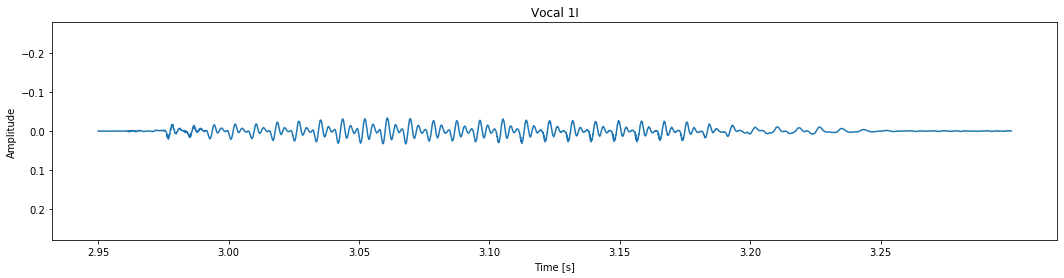

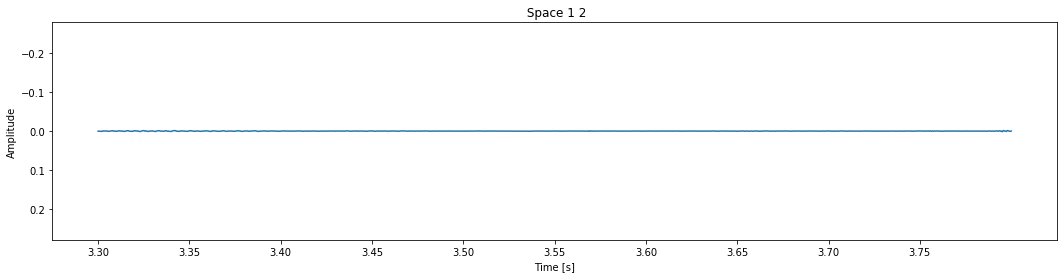

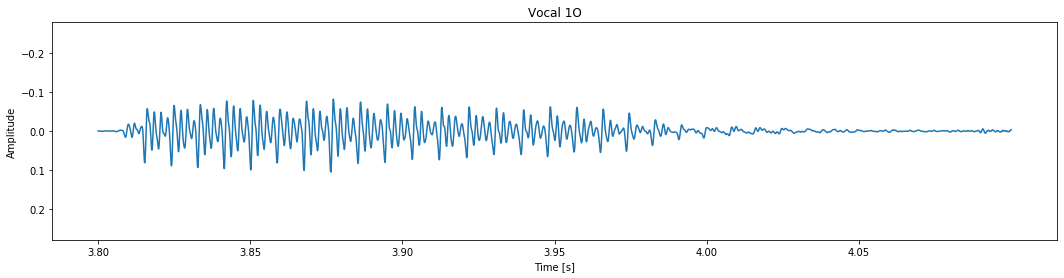

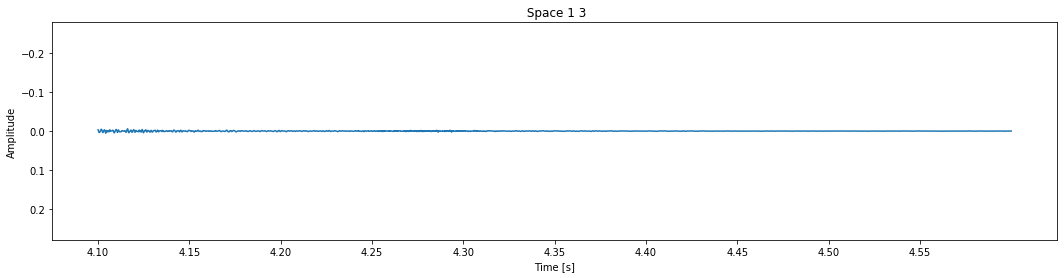

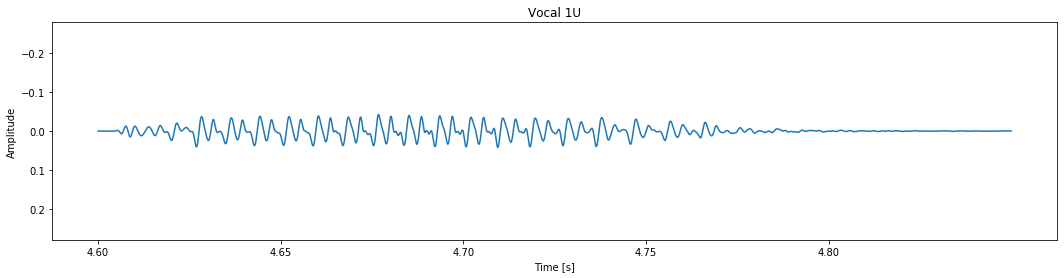

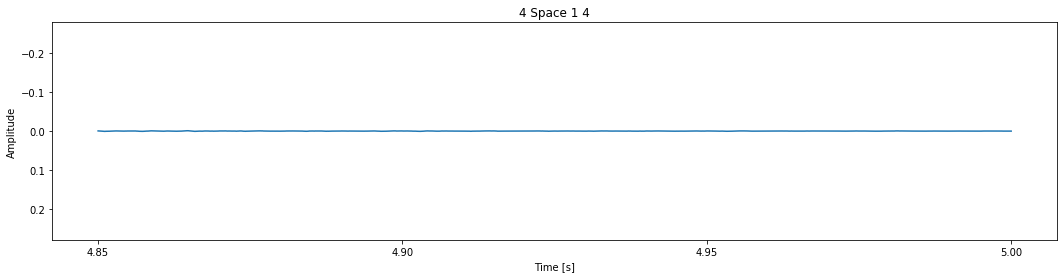

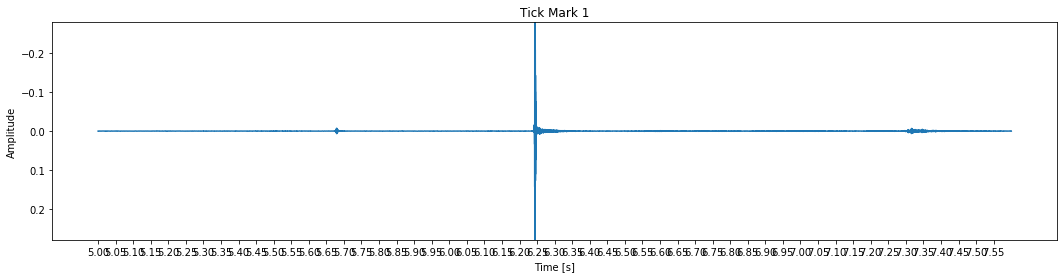

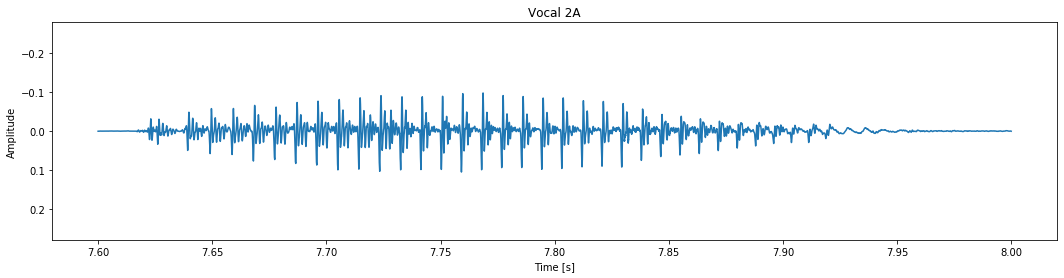

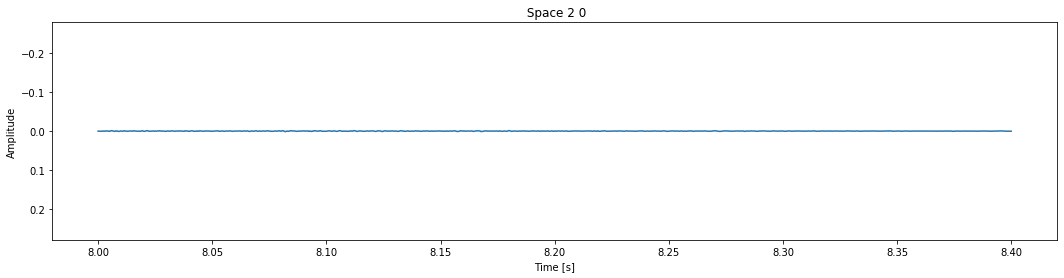

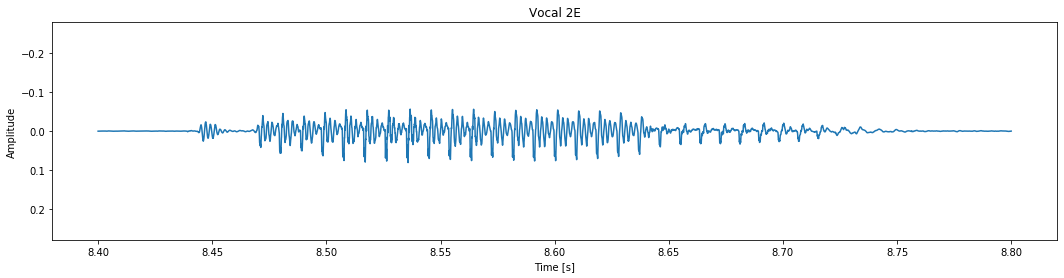

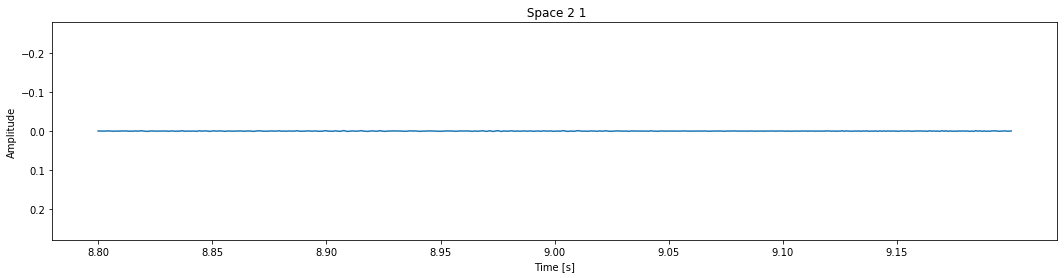

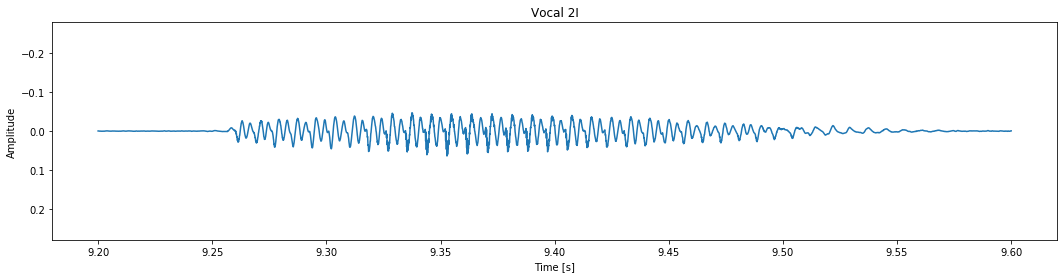

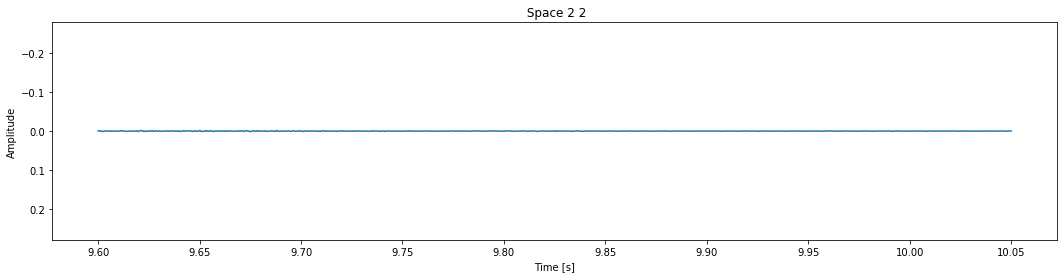

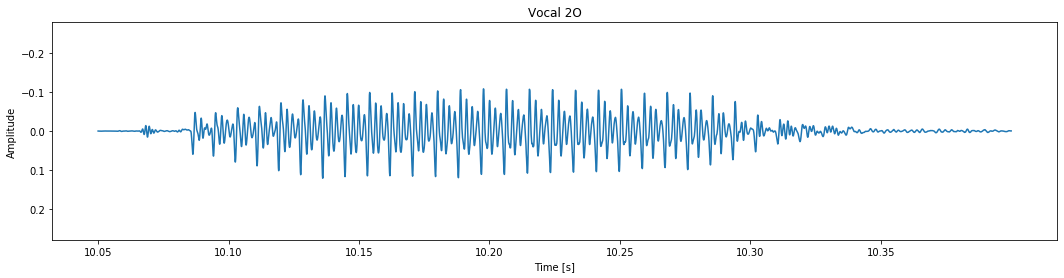

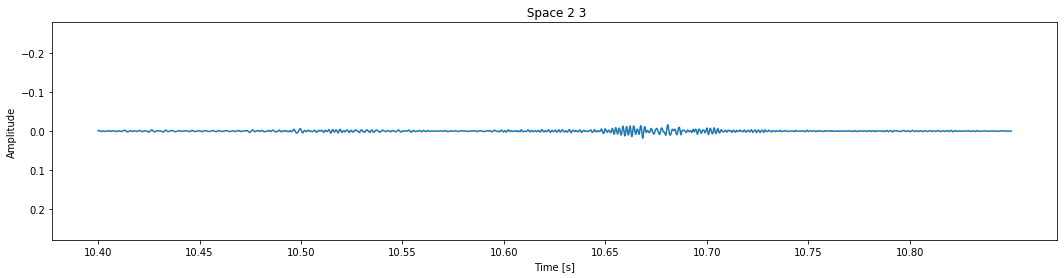

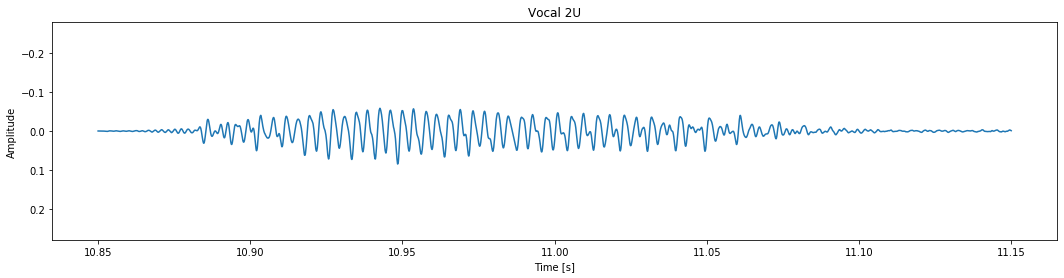

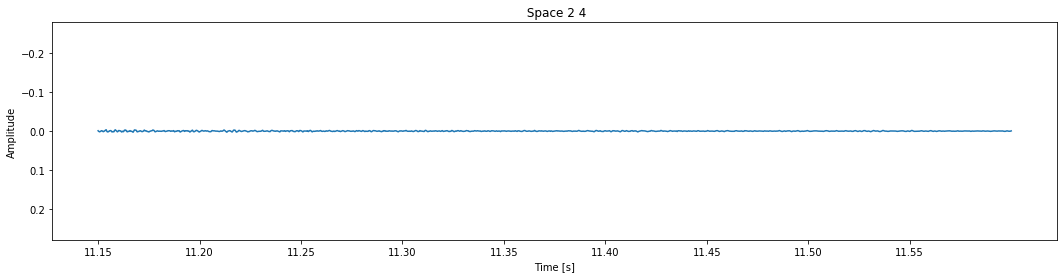

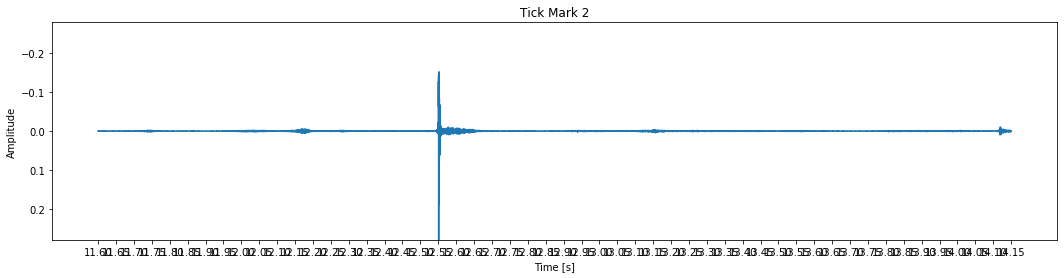

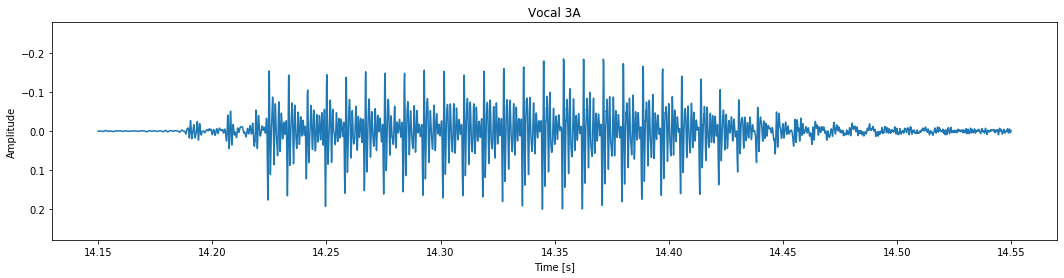

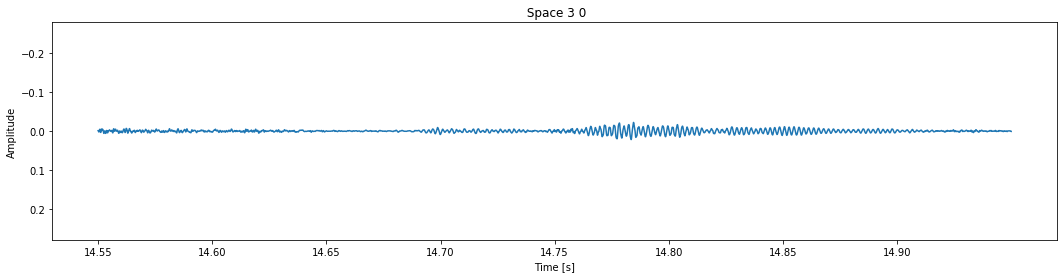

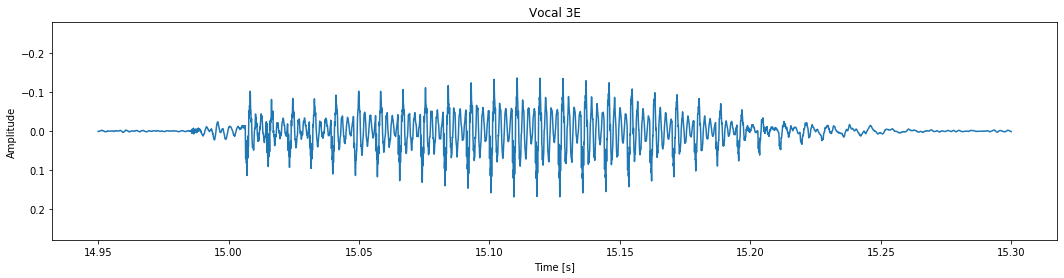

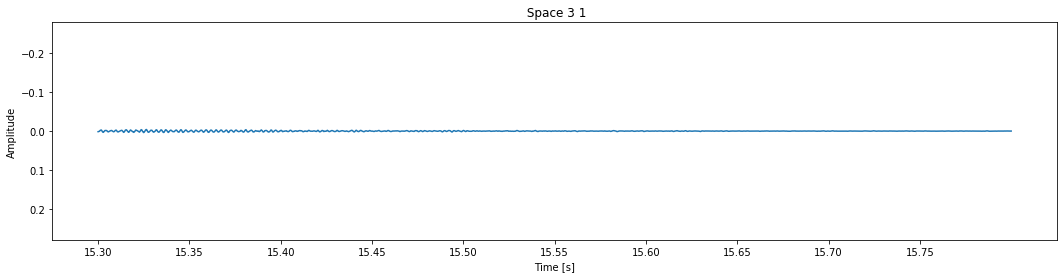

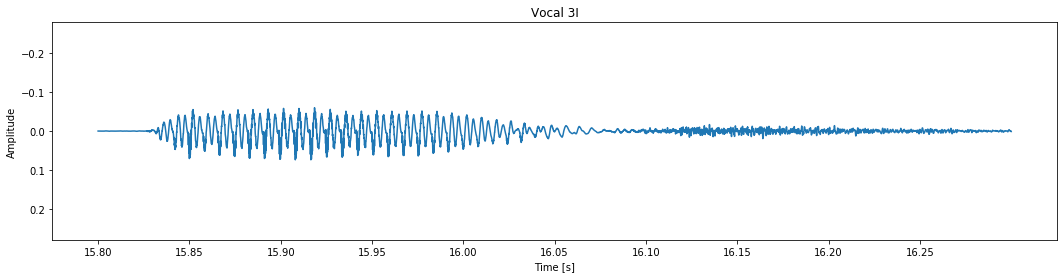

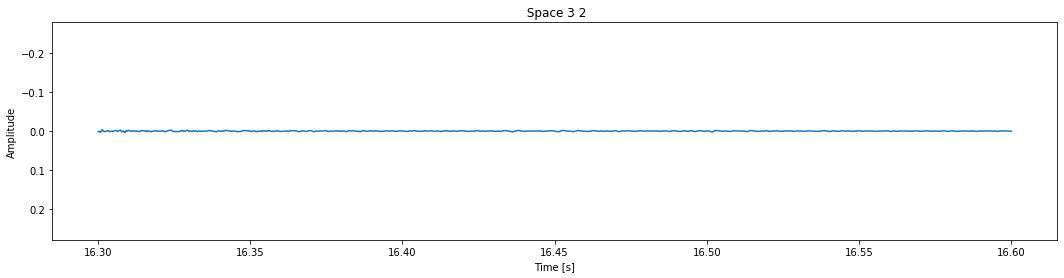

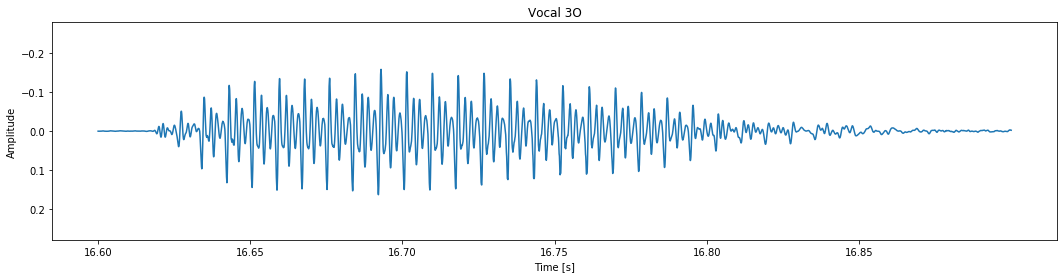

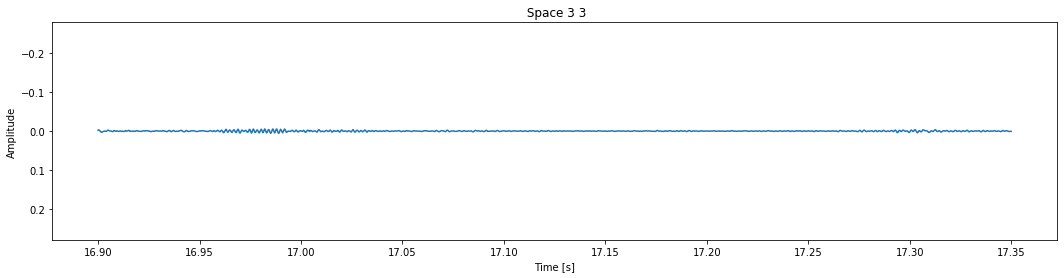

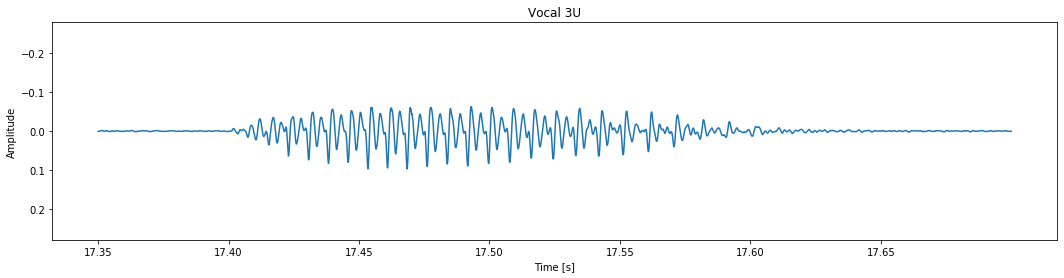

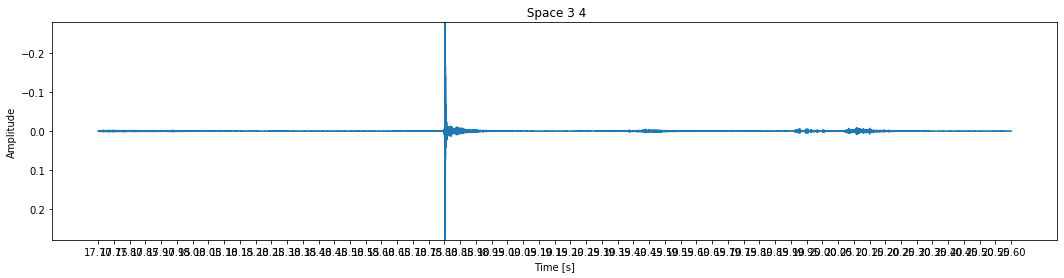

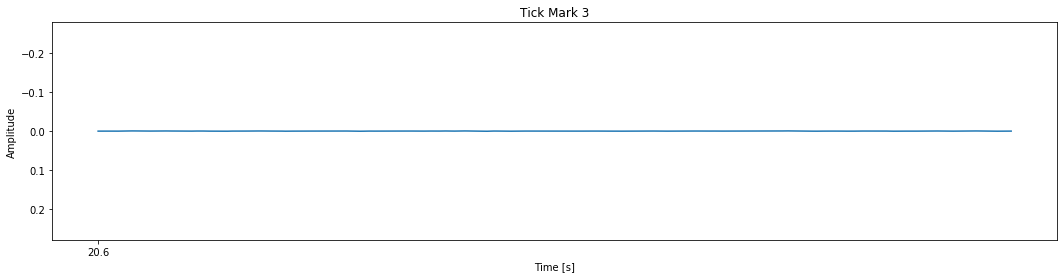

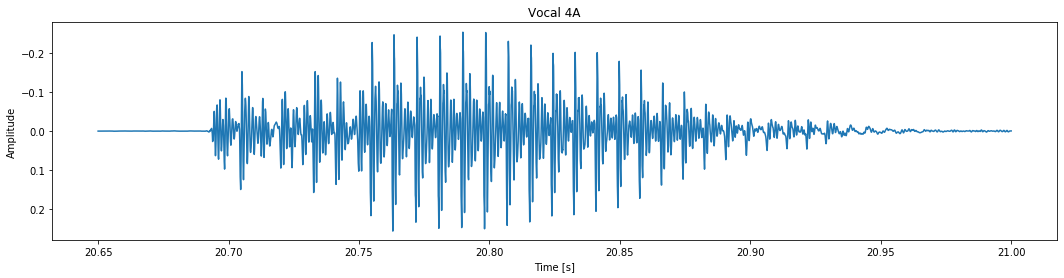

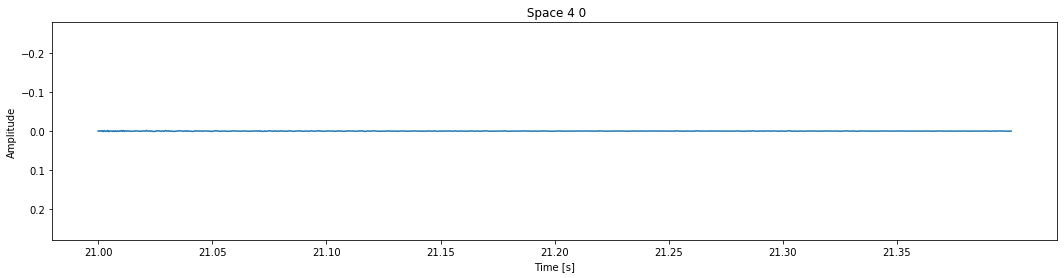

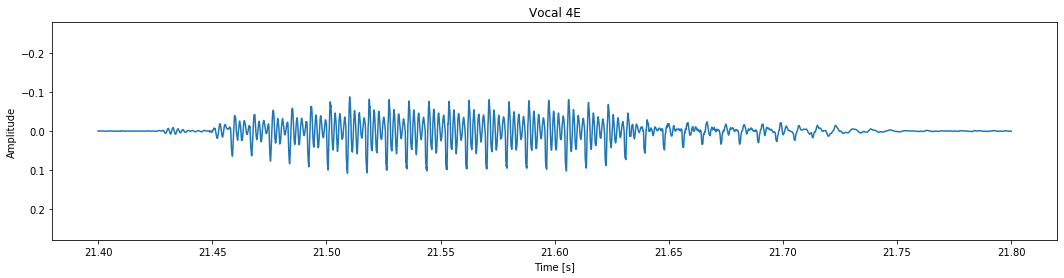

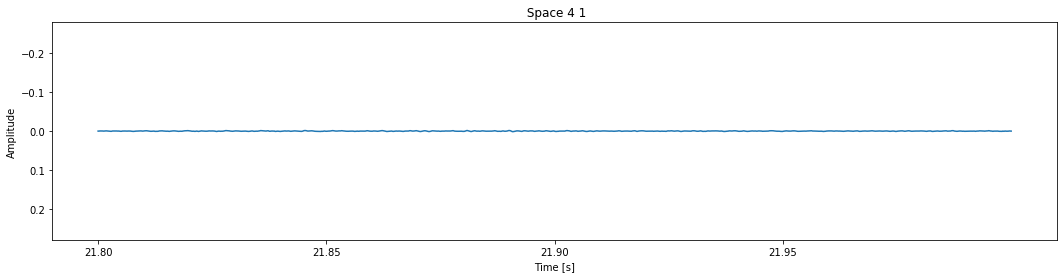

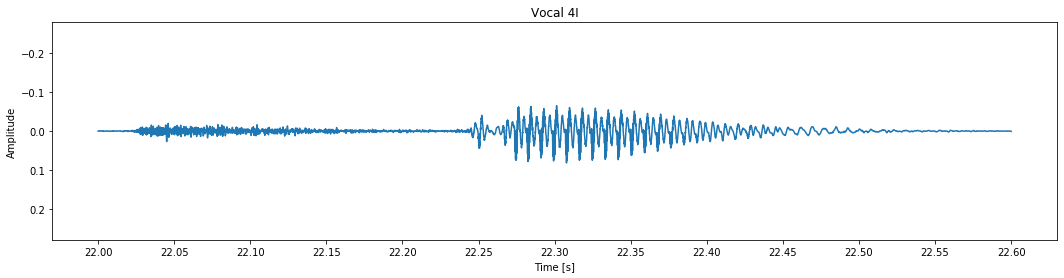

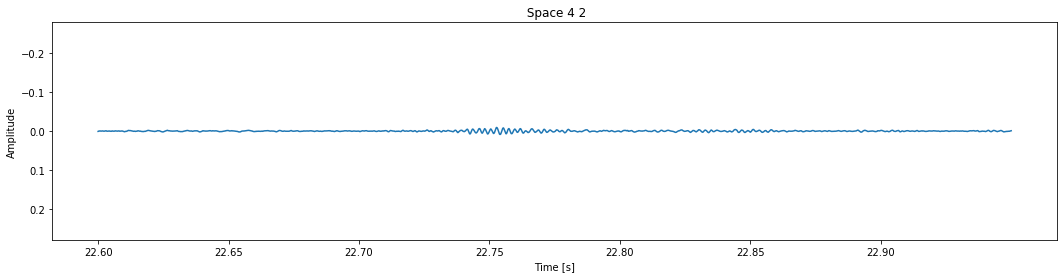

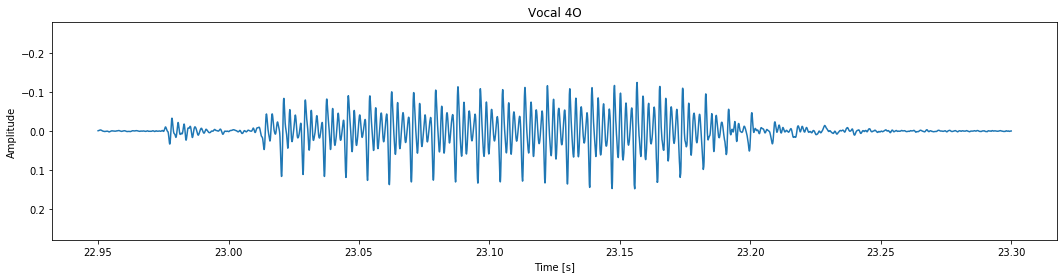

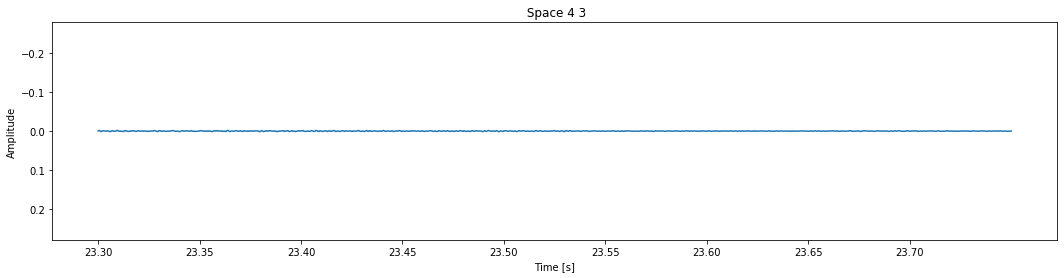

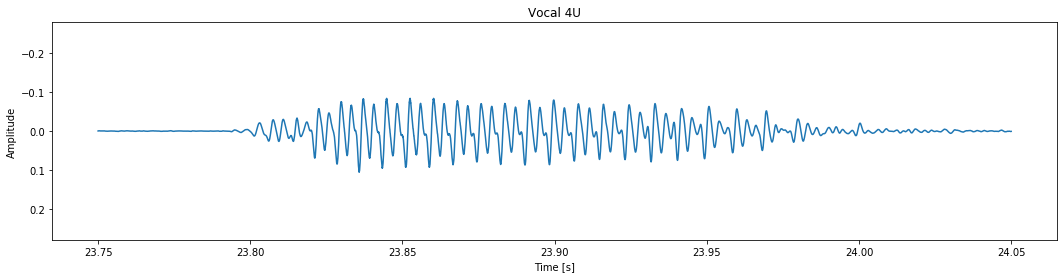

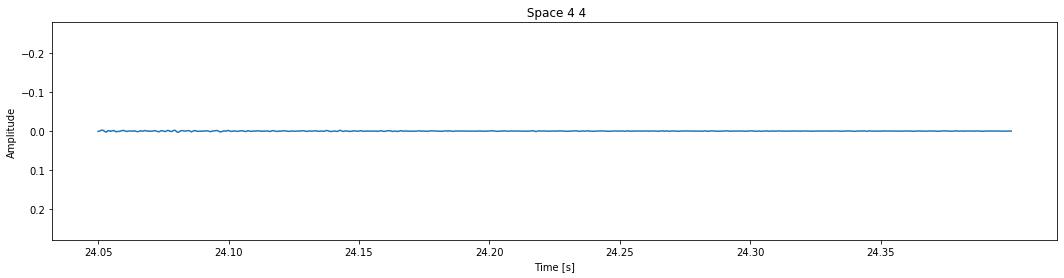

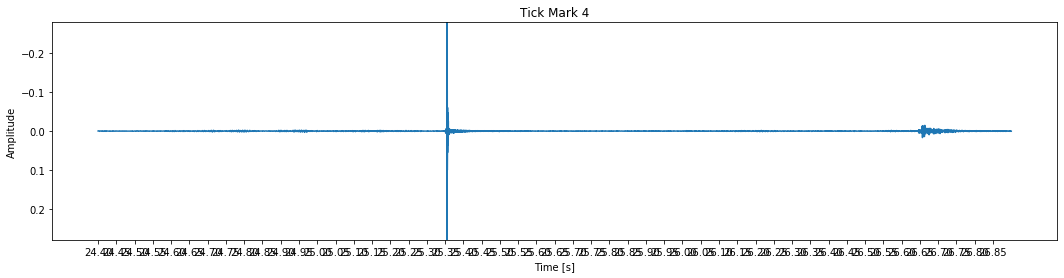

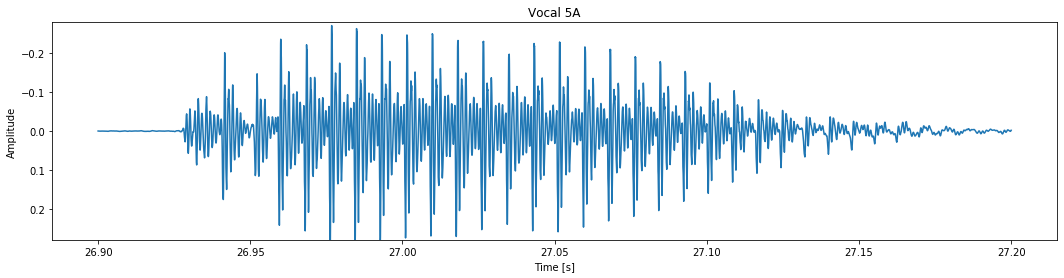

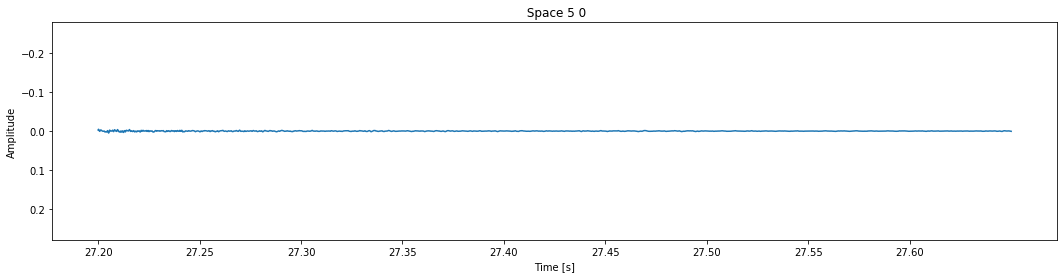

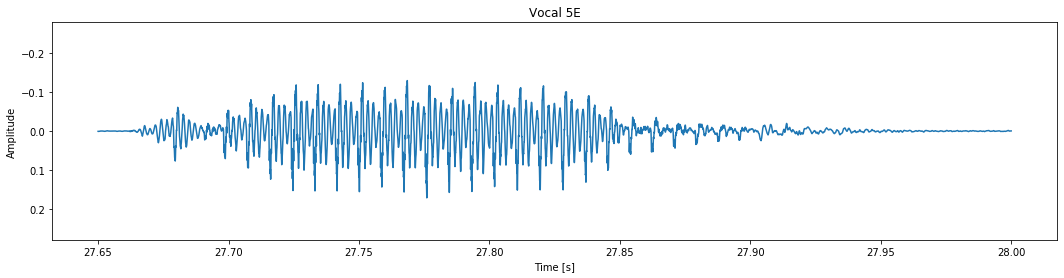

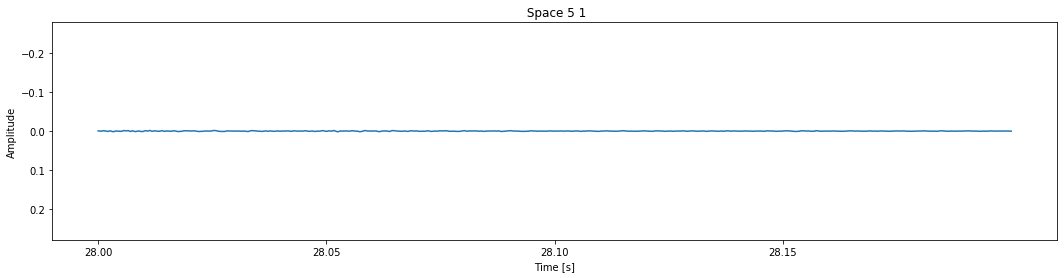

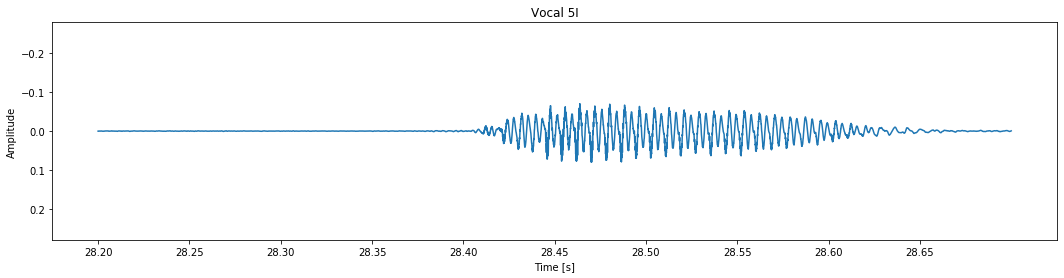

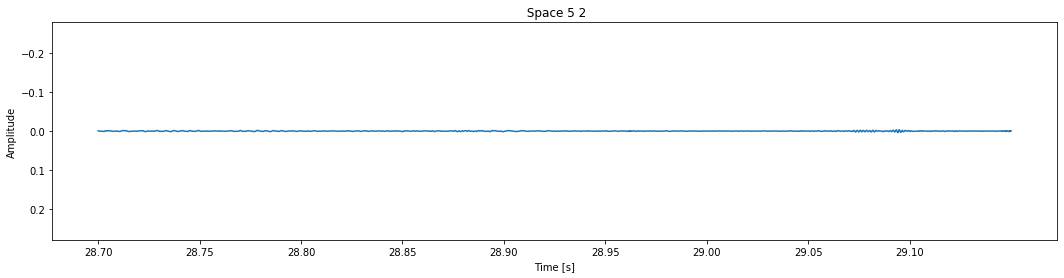

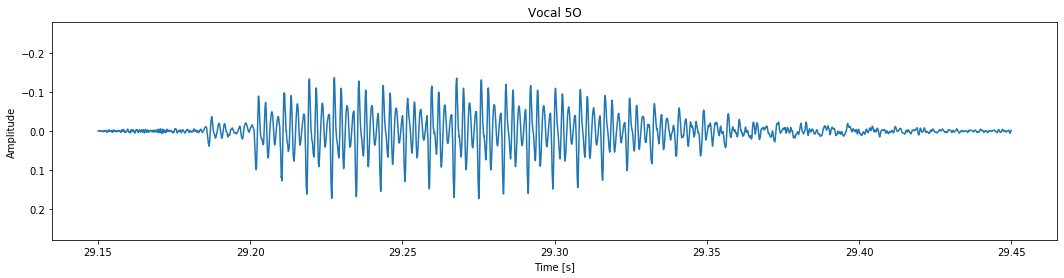

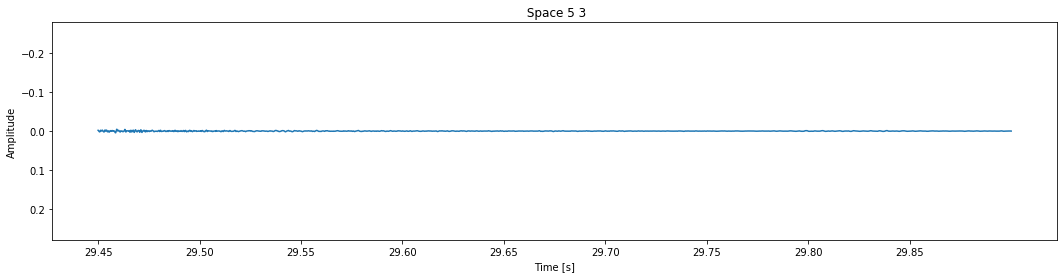

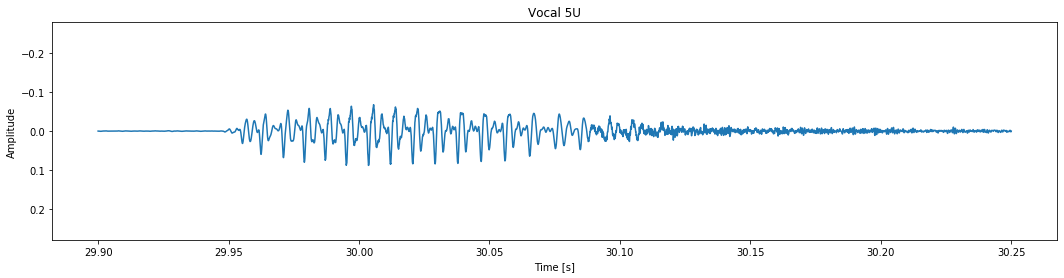

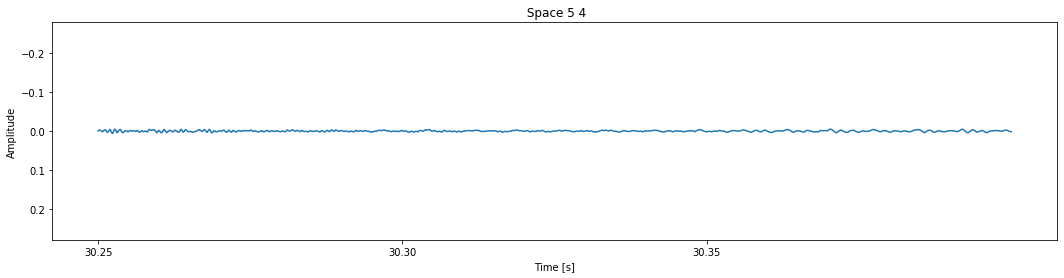

In [25]:
def displayAudios(dataArr,titles,timeIntervals,maxAmp=1,step=0.1):
    
    for data,title,timeInterval in zip(dataArr,titles,timeIntervals):
        disp.audio(data,title,timeInterval,maxAmp=maxAmp,step=step)
        plt.show()
        
titles = config['LABEL'].to_numpy()
displayAudios(split,titles,timeIntervals,maxAmp=0.28, step = 0.05)

In [ ]:
titles = config['LABEL'].to_numpy()
displayAudios(split,titles,timeIntervals,step = 0.05)

# What is the pythonic way to loop through two arrays at the same time?


https://stackoverflow.com/questions/14293869/what-is-the-pythonic-way-to-loop-through-two-arrays-at-the-same-time

In [13]:
def cutExcess(x,marks,Fs):
    interval = calculateInterval(marks[0],marks[1],Fs)
    return x[interval[0]:interval[1]]

    
def saveToWav(data,sr,fileName):
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html
    audioFilePath = os.path.join(dataDirectory, sampleType, fileName + '.wav')
    wavfile.write(audioFilePath, sr, data)
    return audioFilePath


# def displayAudios(dataArr,intervals,titles):
    
#     for data,interval,title in zip(dataArr,intervals,titles):
#         disp.audio(data,interval,title)
#         plt.show()

def saveAudio(data,sr,fileName):
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html
    #                            /data          /vocal_audio    /your_chosen_name.wav
    audioFilePath = os.path.join(dataDirectory, sampleType, fileName + '.wav')
    wavfile.write(audioFilePath, sr, data)
    return audioFilePath

def splitAndSave(data, marks, sampleRate, fileNames):
    audios,intervals = splitData(data, marks, sampleRate)
    filePaths = []
    for audio,fileName in zip(audios,fileNames):
        filePaths.append(saveAudio(data,sampleRate,fileName))
    return filePaths